In [60]:
import os

import itertools
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

import ml_insights as mli
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
datadir = os.path.join(os.path.realpath('.'), '..')
print os.listdir(datadir)

['data', 'hca_all_recode.csv', '.~lock.results.csv#', 'data_preparation.py', '.gitignore', 'README.md', 'hca_all.csv', 'tenure.py', 'hca_household_vars.csv', '.idea', 'hca_household_vars_recode.csv', 'notebooks', '.~lock.tuned_parameters.csv#', 'tuned_parameters.csv', '.git', 'classifier_tuning.pyc', 'results.csv', 'classifier_tuning.py']


In [25]:
datafile = os.path.join(datadir, 'hca_household_vars_recode.csv')
params = pd.read_csv(os.path.join(datadir, 'tuned_parameters.csv'), index_col=0)

In [26]:
estimator_params = params['RandomForestClassifier'].dropna().to_dict()

In [41]:
# Convert parameters to int if appropriate

for key, value in estimator_params.iteritems():
    try:
        estimator_params[key] = int(value)
    except ValueError:
        estimator_params[key] = value

In [43]:
estimator = RandomForestClassifier(**estimator_params)

In [50]:
df = pd.read_csv(datafile)

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], )

In [44]:
data = df.as_matrix()
X = data[:, :-1]
y = data[:, -1]

In [52]:
estimator.fit(df_X_train, df_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=8, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

array([ 0.,  0.,  0., ...,  0.,  0.,  1.])

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(df_y_test, estimator.predict(df_X_test))

0.75848863926474341

In [57]:
xray = mli.ModelXRay(model=estimator, data=df_X_test)

array([3681,  251, 3297, 3501,  128, 2186,  880, 1264, 2991, 3446])

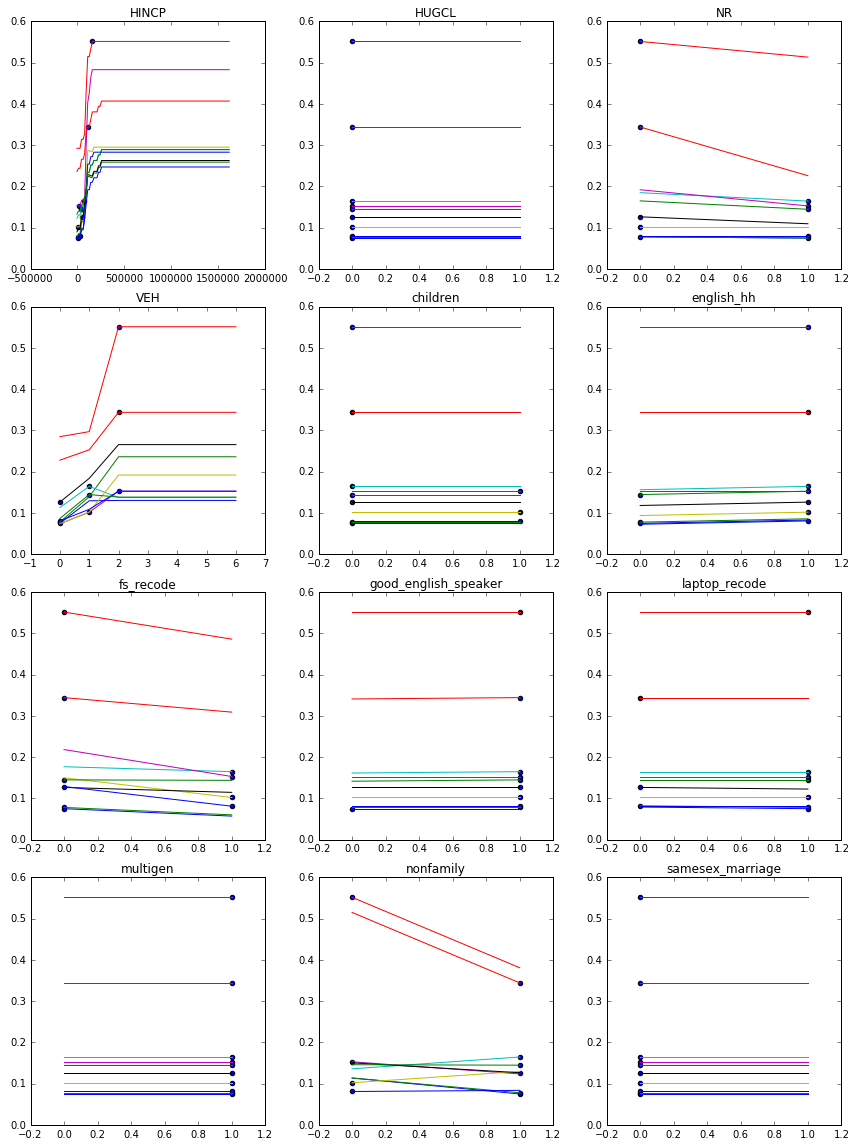

In [63]:
xray.feature_dependence_plots(num_pts=10)

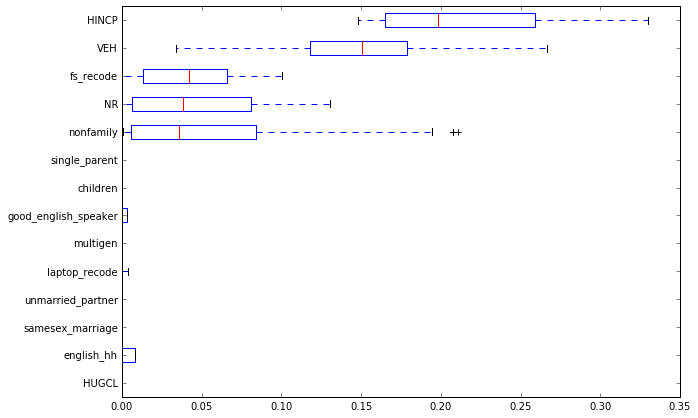

In [62]:
xray.feature_effect_summary()

In [70]:
df_X_test

,fs_recode,laptop_recode,VEH,english_hh,single_parent,nonfamily,HINCP,HUGCL,children,good_english_speaker,multigen,NR,unmarried_partner,samesex_marriage
1872,0.0,1.0,1.0,1.0,0.0,0.0,48000.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
15208,0.0,1.0,2.0,1.0,0.0,1.0,60000.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4463,0.0,1.0,1.0,0.0,0.0,1.0,36000.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
11734,0.0,1.0,1.0,0.0,1.0,0.0,58900.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7022,0.0,1.0,2.0,1.0,0.0,1.0,648000.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
9305,0.0,1.0,1.0,0.0,0.0,1.0,2000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2945,1.0,1.0,0.0,0.0,0.0,0.0,311400.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
10850,0.0,1.0,1.0,0.0,0.0,0.0,100000.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
13776,0.0,1.0,2.0,1.0,0.0,0.0,660500.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
10380,0.0,1.0,2.0,1.0,0.0,1.0,140000.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [75]:
xray.explain_prediction_difference(0, 2, tol=0.05)

Your initial point has a target value of 0.1783
Your final point has a target value of 0.1474
Changing HINCP from 48000.0 to 36000.0
		changes your target by -0.0217 to 0.1566
----------
Changing english_hh from 1.0 to 0.0
		changes your target by -0.0081 to 0.1485
----------
Tolerance of 0.05 reached
Current value of 0.1485 is within 5.0% of 0.1474


(['HINCP', 'english_hh'],
 [(48000.0, 36000.0), (1.0, 0.0)],
 [-0.021746353985205996, -0.0081126349471814241],
 [0.17833471195260506, 0.15658835796739906, 0.14847572302021764])

In [74]:
df_y_train.value_counts()

0.0    8710
1.0    3040
Name: tenure_own, dtype: int64